<a href="https://colab.research.google.com/github/ahmadhfs/Early-Stage-Project-Success-Measurement/blob/main/Early_Stage_Project_Success_Measurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Data**

##1.1 Load

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset as CSV file
data = pd.read_csv('ks-projects-201801.csv')

In [3]:
# Print the first 5 rows of the dataset
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
# Genral info. about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


##1.2 Clean

### 1.2.1 Null Values

In [5]:
# The number of null values per columns
data.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

### 1.2.2 Duplicates

In [6]:
# Check for duplicates
print('Number of duplicated project\t',data.duplicated(subset='name').sum())

Number of duplicated project	 2896


In [7]:
# Filter duplicates
print('Before removing duplicates\t', data.shape)
data = data[~data.duplicated(subset='name')].reset_index(drop=True)
print('After removing duplicates\t', data.shape)

Before removing duplicates	 (378661, 15)
After removing duplicates	 (375765, 15)


### 1.2.3 Unique Values 

In [8]:
# Explore the number of unique values for each columns
for column in data.columns:
    print(f'The number of unique value in {column} :\t {data[column].nunique()}')
    print('============================================')

The number of unique value in ID :	 375765
The number of unique value in name :	 375764
The number of unique value in category :	 159
The number of unique value in main_category :	 15
The number of unique value in currency :	 14
The number of unique value in deadline :	 3164
The number of unique value in goal :	 8324
The number of unique value in launched :	 375204
The number of unique value in pledged :	 61895
The number of unique value in state :	 6
The number of unique value in backers :	 3949
The number of unique value in country :	 23
The number of unique value in usd pledged :	 95000
The number of unique value in usd_pledged_real :	 105513
The number of unique value in usd_goal_real :	 50086


In [9]:
# Visual check of unique values in category column
data.category.unique()

array(['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants',
       'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction',
       'Indie Rock', 'Crafts', 'Games', 'Tabletop Games', 'Design',
       'Comic Books', 'Art Books', 'Fashion', 'Childrenswear', 'Theater',
       'Comics', 'DIY', 'Webseries', 'Animation', 'Food Trucks',
       'Public Art', 'Illustration', 'Photography', 'Pop', 'People',
       'Art', 'Family', 'Fiction', 'Accessories', 'Rock', 'Hardware',
       'Software', 'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear',
       'Festivals', 'Video Games', 'Anthologies', 'Publishing', 'Shorts',
       'Electronic Music', 'Radio & Podcasts', 'Apps', 'Cookbooks',
       'Apparel', 'Metal', 'Comedy', 'Hip-Hop', 'Periodicals', 'Dance',
       'Technology', 'Painting', 'World Music', 'Photobooks', 'Drama',
       'Architecture', 'Young Adult', 'Latin', 'Mobile Games', 'Flight',
       'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk',
       

In [10]:
# Visual check of unique values in main category column
data.main_category.unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [11]:
# Visual check of unique values in currency column
data.currency.unique()

array(['GBP', 'USD', 'CAD', 'AUD', 'NOK', 'EUR', 'MXN', 'SEK', 'NZD',
       'CHF', 'DKK', 'HKD', 'SGD', 'JPY'], dtype=object)

In [12]:
# Visual check of unique values in state column
data.state.unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [13]:
# Visual check of unique values in country column
data.country.unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG',
       'JP'], dtype=object)

### 1.2.4 Filters & Masking

In [14]:
# Parse the date, filter column values, 
# change columns types, and drop unnecessary columns 

def clean_df(data):
    return (data
            # Filter state column to contain only failed and successful
            [(data.state.isin(['failed', 'successful'])) &
            # Filter country column and remove 'N,0"'                  
             (data.country.isin(['GB','US','CA','AU','NO','IT','DE','IE',
                                 'MX','ES','SE','FR','NL','NZ','CH','AT',
                                 'DK','BE','HK','LU','SG','JP']))
            ]


            # Parse the launched and deadline dates
            .assign(
                  launched = pd.to_datetime(data.launched, errors ='coerce'),
                  deadline = pd.to_datetime(data.deadline, errors ='coerce'),
            )

            # Change columns types
            .astype(
                    {'currency':'category', 'goal':'float32', 
                     'pledged':'float32', 'category':'category',
                     'backers':'int8', 'country':'category', 
                     'state':'category','main_category':'category'}
                   )
            
            .dropna().reset_index(drop=True)
            # Drop unnecessary columns
            .drop(['usd pledged', 'usd_goal_real', 'usd_pledged_real', 'ID'], axis=1)
           )

In [15]:
# Apply claening function
data = clean_df(data)

In [16]:
# Recheck the genral info. of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329126 entries, 0 to 329125
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   name           329126 non-null  object        
 1   category       329126 non-null  category      
 2   main_category  329126 non-null  category      
 3   currency       329126 non-null  category      
 4   deadline       329126 non-null  datetime64[ns]
 5   goal           329126 non-null  float32       
 6   launched       329126 non-null  datetime64[ns]
 7   pledged        329126 non-null  float32       
 8   state          329126 non-null  category      
 9   backers        329126 non-null  int8          
 10  country        329126 non-null  category      
dtypes: category(5), datetime64[ns](2), float32(2), int8(1), object(1)
memory usage: 12.2+ MB


**Discovering Outliers**

In [17]:
# Check min , max, mean of numerical columns
data.describe().round(1)

,goal,pledged,backers
count,329126.0,329126.0,329126.0
mean,44142.1,10602.8,15.7
std,1108063.6,101574.0,43.6
min,0.0,0.0,-128.0
25%,2000.0,50.0,1.0
50%,5000.0,786.5,7.0
75%,15000.0,4680.2,34.0
max,100000000.0,20338986.0,127.0


In [18]:
# Check min , max, launched and deadline dates
print('Min. launched date\t', data.launched.min())
print('Max. launched date\t', data.launched.max())
print('=======================================')
print('Min. deadline date\t', data.deadline.min())
print('Max. deadline date\t', data.deadline.max())

Min. launched date	 2009-04-21 21:02:48
Max. launched date	 2017-12-29 03:22:32
Min. deadline date	 2009-05-03 00:00:00
Max. deadline date	 2018-01-02 00:00:00


In [19]:
# Find the max and min of goal column
data.goal.min(), data.goal.max()

(0.009999999776482582, 100000000.0)

The lower limit was clipped while the upper limit could be clearly classlified as an outlier in this case, so one technique that could be utilize is Inter Quartile Range (IQR).

In [20]:
# Interquartile Range to filter goal column
IQR = data.goal.describe()['75%'] - data.goal.describe()['25%']
Lower_goal = data.goal.describe()['mean'] - 3*IQR
Upper_goal = data.goal.describe()['mean'] + 3*IQR
print('Lower Limit\t', Lower_goal)
print('Upper Limit\t', Upper_goal)

Lower Limit	 5142.11328125
Upper Limit	 83142.11328125


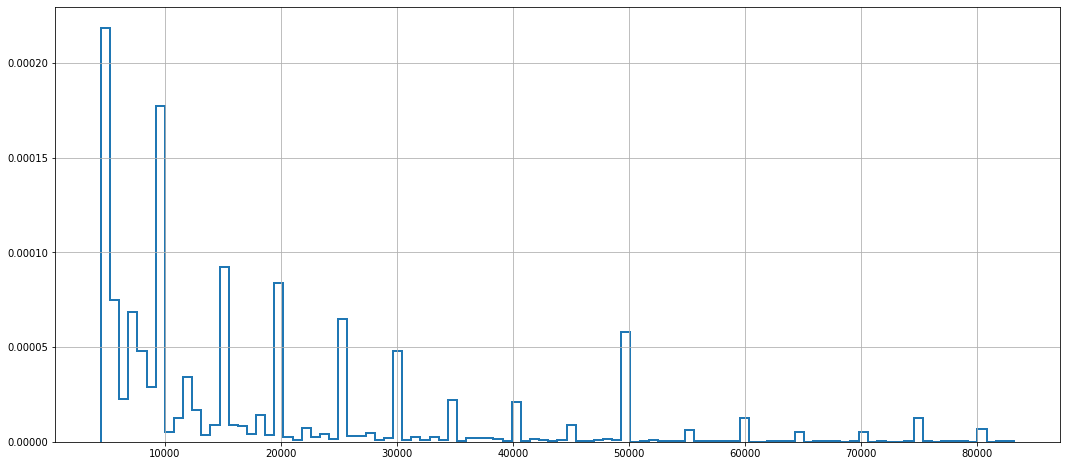

In [21]:
plt.figure(figsize=(18,8))
counts, bins, bars = plt.hist(data.goal,bins=100,histtype='step', density=True, range=(4500,Upper_goal), 
         label='Goal ECDF', linewidth=2)

plt.grid()
plt.show()

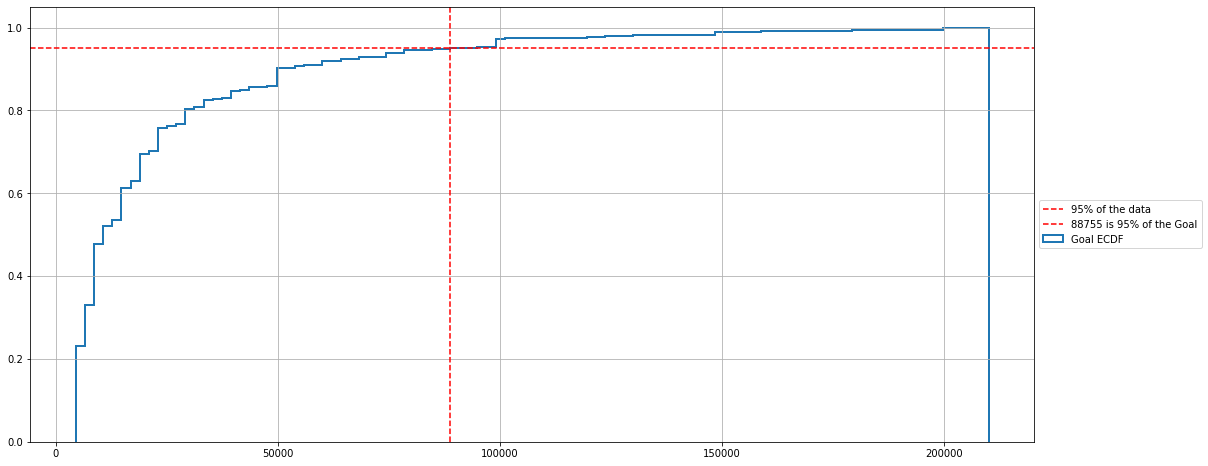

In [22]:
LIMITS = 0.95

plt.figure(figsize=(18,8))

counts, bins, bars = plt.hist(data.goal,bins=100,histtype='step', density=True, range=(4500,2_100_00), cumulative=1,
         label='Goal ECDF', linewidth=2)

plt.grid()
plt.axhline(LIMITS, color='r', linestyle='--', label='95% of the data')
plt.axvline(bins[:-1][counts>LIMITS][0], color='r', linestyle='--', label=f'{int(bins[:-1][counts>LIMITS][0])} is 95% of the Goal')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Although the IQR suggested that an upper limit of around 88,755 but the model should be traind on real cases even if they seems unlikly. Thus, in fact, the maximuim goal of a project that was succesful is 2 million, so safely the upper limit could be clipped to 2 million.

In [23]:
print('Max. successful project goal is\t', data.groupby('state').goal.max()['successful'])

Max. successful project goal is	 2000000.0


In [24]:
print('Before masking\t', data.shape)
# Mask based on minimum backers, goal ,and launched dates
mask = (data.backers> 0) & (data.launched >= pd.Timestamp('2009-04-21 21:02:48')) & (data.goal>= round(Lower_goal, -3)) & (data.goal<=2_000_000)
data = data[mask].sort_values(by='launched').reset_index(drop=True)
print('After masking\t', data.shape)

Before masking	 (329126, 11)
After masking	 (137341, 11)


In [25]:
data.set_index('launched', drop=True, inplace=True)
data.head()

,name,category,main_category,currency,deadline,goal,pledged,state,backers,country
launched,,,,,,,,,,
2009-04-23 00:07:53,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,2009-07-20,80000.0,22.0,failed,3,US
2009-04-30 22:22:43,Accidental to Edinburgh - PHASE 1: AIRFARE,Theater,Theater,USD,2009-06-05,6000.0,6575.0,successful,24,US
2009-04-30 22:23:22,Accidental to Edinburgh - PHASE 1: REBUILDING ...,Theater,Theater,USD,2009-07-15,10000.0,10145.0,successful,27,US
2009-05-05 01:48:21,"""LostLES"" at Tiny's Giant",Painting,Art,USD,2009-06-06,5000.0,5045.0,successful,44,US
2009-05-11 17:34:54,Anatomy of a Credibility Meltdown — a book abo...,Nonfiction,Publishing,USD,2009-06-15,30000.0,490.0,failed,7,US


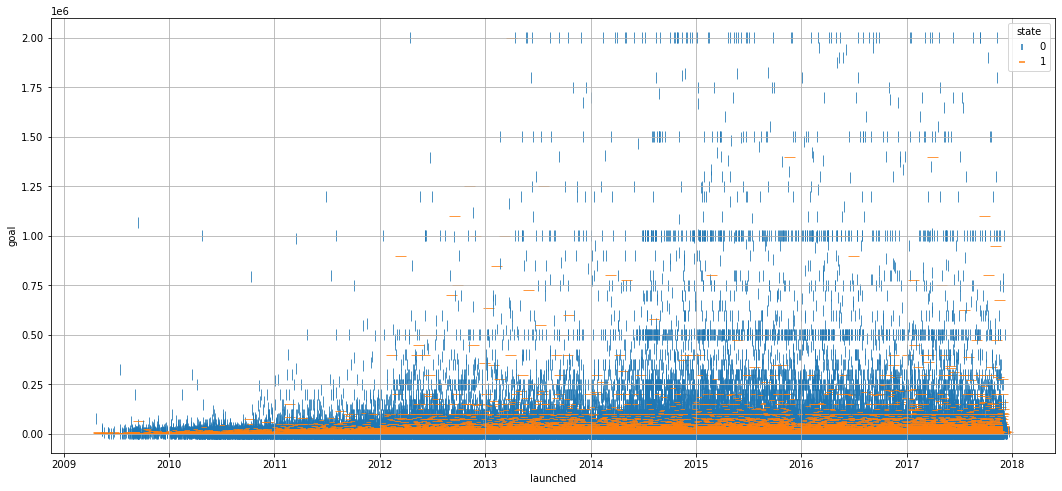

In [26]:
import seaborn as sns
plt.figure(figsize=(18,8))
data.state = data.state.replace({'failed':0, 'successful':1})
sns.scatterplot(data=data, x=data.index, y='goal', hue='state',
                style='state', ci=None, edgecolor="none", s=120, alpha=0.9,
                markers= {0: "|", 1: "_"}, linewidths=2 )
plt.grid()
plt.show()

### 1.2.5 Text Preprocessing

In [27]:
# Text preprocessing steps:
# remove numbers, stopwords, whitespace characters, captial letters, and punctuation
import re
import string
from gensim.parsing.preprocessing import remove_stopwords


alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
spaces = lambda x: re.sub('\s{2,}', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x.lower())

data['name'] = data.name.map(alphanumeric).map(punc_lower).map(remove_stopwords).map(spaces)
data.head()

,name,category,main_category,currency,deadline,goal,pledged,state,backers,country
launched,,,,,,,,,,
2009-04-23 00:07:53,crystal antlers untitled movie,Shorts,Film & Video,USD,2009-07-20,80000.0,22.0,0,3,US
2009-04-30 22:22:43,accidental edinburgh phase airfare,Theater,Theater,USD,2009-06-05,6000.0,6575.0,1,24,US
2009-04-30 22:23:22,accidental edinburgh phase rebuilding set,Theater,Theater,USD,2009-07-15,10000.0,10145.0,1,27,US
2009-05-05 01:48:21,lostles tinys giant,Painting,Art,USD,2009-06-06,5000.0,5045.0,1,44,US
2009-05-11 17:34:54,anatomy credibility meltdown — book voting mac...,Nonfiction,Publishing,USD,2009-06-15,30000.0,490.0,0,7,US


##1.3 Feature Engineering/Extraction

### 1.3.1 New Features

In [28]:
data.reset_index(inplace=True)
# Number of words in title
data['title_len'] = data.name.apply(len).astype('int8')
# Launched date day
data['day_date'] = data.launched.dt.day.astype('int8')
# Launched date month
data['month_date'] = data.launched.dt.month.astype('int8')
# Launched date year
data['year_date'] = data.launched.dt.year.astype('int16')
# How many days the project was listed
data['period'] = (data.deadline - data.launched).dt.days.astype('int16')
# What day of the week the project was launched
data['start_dayofweek'] = data.launched.dt.dayofweek.astype('int8')
data['start_day_name'] = data.launched.dt.day_name()
# What day of the week the project was ended
data['end_dayofweek'] = data.deadline.dt.dayofweek.astype('int8')
data['end_day_name'] = data.deadline.dt.day_name()

# Helper function to calculate number of hour 
# since last project at the same category was launched
def time_since_last_project(series):
    # Return the time in hours
    return series.diff().dt.total_seconds() / 3600.

# Intermediate steps
temp = data[['category', 'launched']].sort_values('launched')
timedeltas = temp.groupby('category').transform(time_since_last_project)

# Calculate the median per category
temp = pd.concat([temp.category, timedeltas], axis=1)
category_dict = temp.groupby('category')['launched'].median().to_dict()

# Fill the null values by the median of each category
for index, row in temp[temp.launched.isna()].iterrows():
  temp.launched.loc[index] = category_dict.get(row[0])

# Number of hour since last project at the same category launched
data['time_since_last'] = temp.launched.to_numpy()

In [29]:
data.head()

,launched,name,category,main_category,currency,deadline,goal,pledged,state,backers,country,title_len,day_date,month_date,year_date,period,start_dayofweek,start_day_name,end_dayofweek,end_day_name,time_since_last
0,2009-04-23 00:07:53,crystal antlers untitled movie,Shorts,Film & Video,USD,2009-07-20,80000.0,22.0,0,3,US,30,23,4,2009,87,3,Thursday,0,Monday,10.245278
1,2009-04-30 22:22:43,accidental edinburgh phase airfare,Theater,Theater,USD,2009-06-05,6000.0,6575.0,1,24,US,34,30,4,2009,35,3,Thursday,4,Friday,15.986667
2,2009-04-30 22:23:22,accidental edinburgh phase rebuilding set,Theater,Theater,USD,2009-07-15,10000.0,10145.0,1,27,US,41,30,4,2009,75,3,Thursday,2,Wednesday,0.010833
3,2009-05-05 01:48:21,lostles tinys giant,Painting,Art,USD,2009-06-06,5000.0,5045.0,1,44,US,19,5,5,2009,31,1,Tuesday,5,Saturday,56.493056
4,2009-05-11 17:34:54,anatomy credibility meltdown — book voting mac...,Nonfiction,Publishing,USD,2009-06-15,30000.0,490.0,0,7,US,62,11,5,2009,34,0,Monday,0,Monday,11.755000


**The same procedures that has been applied on goal feature , should be done on this one as well. Note, the time since last project is a poisson distribution as expected.**

In [30]:
# Find the max and min of goal column
data.time_since_last.min(), data.time_since_last.max()

(0.0, 41715.57166666666)

In [31]:
IQR = data.time_since_last.describe()['75%'] - data.time_since_last.describe()['25%']

Lower_time_since_last = data.time_since_last.describe()['mean'] - 1.5*IQR
Upper_time_since_last = data.time_since_last.describe()['mean'] + 1.5*IQR
print('Lower Limit\t', Lower_time_since_last)
print('Upper Limit\t', Upper_time_since_last)

Lower Limit	 -1.1250614569253798
Upper Limit	 122.59743854307462


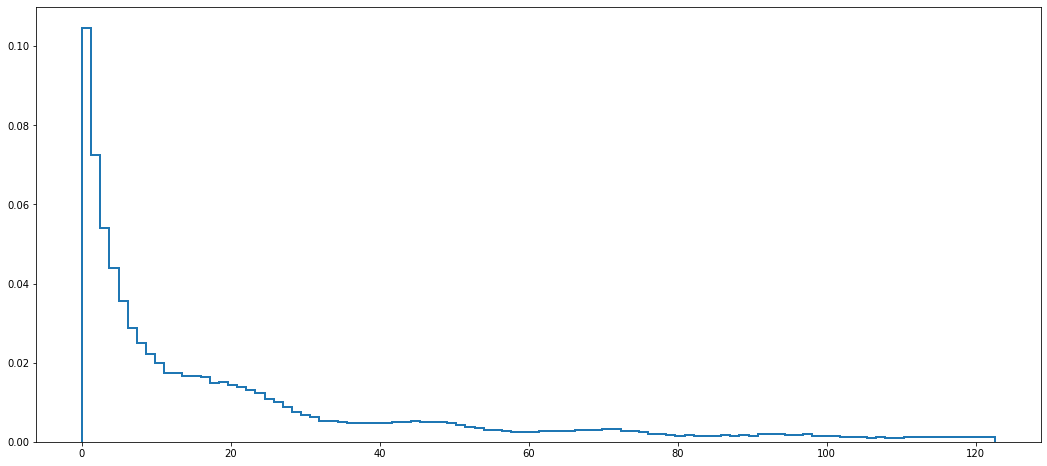

In [32]:
plt.figure(figsize=(18,8))
plt.hist(data.time_since_last,bins=100,histtype='step', density=True,  range=(0,Upper_time_since_last),linewidth=2)
plt.show()

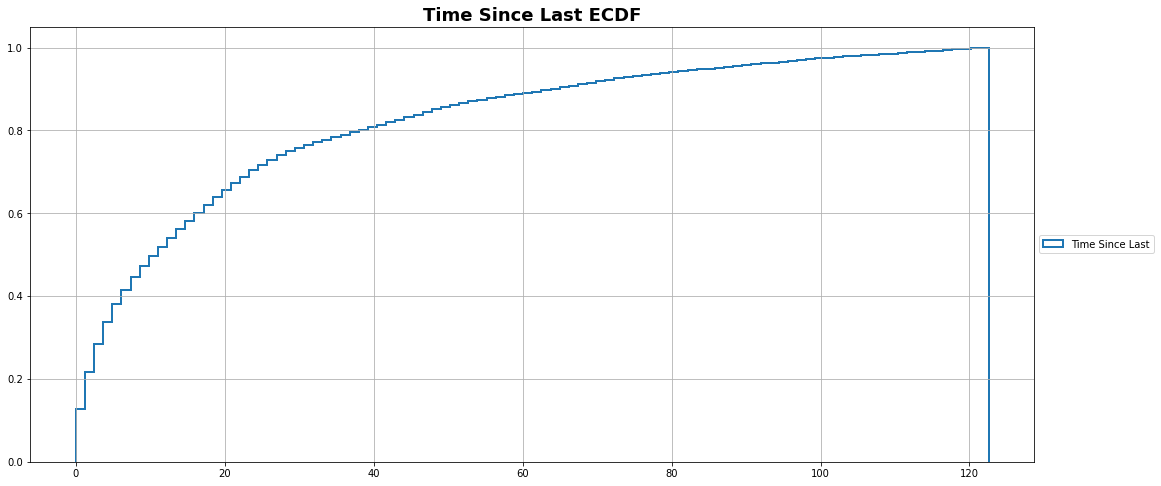

In [33]:
plt.figure(figsize=(18,8))

counts, bins, bars = plt.hist(data.time_since_last,bins=100,histtype='step', density=True,  range=(0,Upper_time_since_last), cumulative=1,
         label='Time Since Last', linewidth=2)

plt.grid()
plt.title('Time Since Last ECDF', fontsize=18, fontweight="bold")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [34]:
mask = (data.time_since_last<=Upper_time_since_last)
data = data[mask]
data.describe()

,goal,pledged,state,backers,title_len,day_date,month_date,year_date,period,start_dayofweek,end_dayofweek,time_since_last
count,1.242350e+05,1.242350e+05,124235.000000,124235.000000,124235.000000,124235.000000,124235.000000,124235.000000,124235.000000,124235.000000,124235.000000,124235.000000
mean,3.625368e+04,1.276658e+04,0.267509,31.597988,27.957065,15.228961,6.438854,2014.258735,34.766523,2.415978,3.207035,22.217686
std,1.025563e+05,1.087546e+05,0.442662,35.566596,13.363843,8.818129,3.309378,1.852397,12.140472,1.751037,1.956211,27.150270
min,5.000000e+03,1.000000e+00,0.000000,1.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000e+03,1.150000e+02,0.000000,3.000000,17.000000,8.000000,4.000000,2013.000000,29.000000,1.000000,2.000000,3.021528
50%,1.250000e+04,1.145000e+03,0.000000,15.000000,27.000000,15.000000,6.000000,2014.000000,29.000000,2.000000,3.000000,11.151667
75%,3.000000e+04,6.710000e+03,1.000000,53.000000,39.000000,23.000000,9.000000,2016.000000,39.000000,4.000000,5.000000,29.512222
max,2.000000e+06,1.277984e+07,1.000000,127.000000,76.000000,31.000000,12.000000,2017.000000,91.000000,6.000000,6.000000,122.596944


In [35]:
vis = data.copy()

### 1.3.2 Scaling & Encoding

Since country, currency, category are nominal features and they have high cardinality which will lead to what known as curse of dimensionality, so using mean encoding technique would be a good choice of start.
* This is a smoothed version of target encoding.


In [36]:
def calc_smooth_mean(df1, cat_name, target, weight):
    # Compute the global mean
    mean = df1[target].mean()

    # Compute the number of values and the mean of each group
    agg = df1.groupby(cat_name)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + weight * mean) / (counts + weight)

    return df1[cat_name].map(smooth)

**Note:**
Improved version of target encoder is leave one out encoder that prevents target leakage. This way out performed the smoothed version of target encoding in this dataset.

In [37]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 352 kB/s 


In [38]:
from category_encoders.leave_one_out import LeaveOneOutEncoder

**The distribution of goal, title length, period, and time since last features are skewed and it is a good practice to transform skewed distributions using log or square-root transformations.**

In [39]:
# Scaling the following columns using Log:
scaled_columns = ['goal', 'title_len', 'period','time_since_last']

for column in scaled_columns: 
  data[column] = data[column].apply(lambda x: np.log(1+x))

**The next step is to create another copy of the data to prepare it for the training phase that contains converting the catgorical columns to one hot encoded ones and scaling the numerical columns by removing the mean and scaling to unit variance. Note that, keeping the original data as is,  because it is easier to deal with in the exploratory analysis.**

In [40]:
# Create a copy of the data
df = data.copy()
# df.state = df.state.replace({'failed':0, 'successful':1})
df = pd.concat((
            # Drop the following columns
            df.drop(['year_date','month_date','end_day_name','start_day_name', 
                      'start_dayofweek', 'end_dayofweek', 'deadline',
                     'pledged', 'backers','day_date'], axis=1),
                
            # One hot encode year
            # pd.get_dummies(data.year_date, prefix='Y'),
            # One hot encode month
            pd.get_dummies(data.month_date,prefix='M'),
            # One hot encode day
            # pd.get_dummies(data.day_date,prefix='D'),# High cardinal column
            # One hot encode launched day name
            pd.get_dummies(data.start_day_name, prefix='SD_'),
            # One hot encode deadline day name
            pd.get_dummies(data.end_day_name, prefix='ED_'),
           ),
          axis=1
         ).dropna().reset_index(drop=True)

In [41]:
df.head()

,launched,name,category,main_category,currency,goal,state,country,title_len,period,time_since_last,M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12,SD__Friday,SD__Monday,SD__Saturday,SD__Sunday,SD__Thursday,SD__Tuesday,SD__Wednesday,ED__Friday,ED__Monday,ED__Saturday,ED__Sunday,ED__Thursday,ED__Tuesday,ED__Wednesday
0,2009-04-23 00:07:53,crystal antlers untitled movie,Shorts,Film & Video,USD,11.289794,0,US,3.433987,4.477337,2.419948,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,2009-04-30 22:22:43,accidental edinburgh phase airfare,Theater,Theater,USD,8.699681,1,US,3.555348,3.583519,2.832429,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,2009-04-30 22:23:22,accidental edinburgh phase rebuilding set,Theater,Theater,USD,9.210440,1,US,3.737670,4.330733,0.010775,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,2009-05-05 01:48:21,lostles tinys giant,Painting,Art,USD,8.517393,1,US,2.995732,3.465736,4.051664,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,2009-05-11 17:34:54,anatomy credibility meltdown — book voting mac...,Nonfiction,Publishing,USD,10.308986,0,US,4.143135,3.555348,2.545923,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 37 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   launched         124235 non-null  datetime64[ns]
 1   name             124235 non-null  object        
 2   category         124235 non-null  category      
 3   main_category    124235 non-null  category      
 4   currency         124235 non-null  category      
 5   goal             124235 non-null  float64       
 6   state            124235 non-null  int64         
 7   country          124235 non-null  category      
 8   title_len        124235 non-null  float64       
 9   period           124235 non-null  float64       
 10  time_since_last  124235 non-null  float64       
 11  M_1              124235 non-null  uint8         
 12  M_2              124235 non-null  uint8         
 13  M_3              124235 non-null  uint8         
 14  M_4              124

#**2. Exploratory Analysis**

##2.1 Statistics

In [ ]:
vis[['goal','pledged','backers','title_len','day_date','month_date','year_date','period']].describe().round(1)

,goal,pledged,backers,title_len,day_date,month_date,year_date,period
count,124235.0,124235.0,124235.0,124235.0,124235.0,124235.0,124235.0,124235.0
mean,36253.7,12766.6,31.6,28.0,15.2,6.4,2014.3,34.8
std,102556.3,108754.6,35.6,13.4,8.8,3.3,1.9,12.1
min,5000.0,1.0,1.0,0.0,1.0,1.0,2009.0,0.0
25%,7000.0,115.0,3.0,17.0,8.0,4.0,2013.0,29.0
50%,12500.0,1145.0,15.0,27.0,15.0,6.0,2014.0,29.0
75%,30000.0,6710.0,53.0,39.0,23.0,9.0,2016.0,39.0
max,2000000.0,12779843.0,127.0,76.0,31.0,12.0,2017.0,91.0


In [ ]:
c = 'main_category'
mcf = pd.concat(
          [vis[c].value_counts().reset_index(),
           pd.Series(vis[c].value_counts(normalize=True).values)*100
          ],
          axis=1).rename(columns={'index':c, c:'frequency',0:'percentage'})

mcf.round(1)

,main_category,frequency,percentage
0,Film & Video,23716,19.1
1,Technology,14749,11.9
2,Design,13220,10.6
3,Music,12815,10.3
4,Games,12462,10.0
5,Publishing,11676,9.4
6,Food,11385,9.2
7,Fashion,7914,6.4
8,Art,5445,4.4
9,Photography,2629,2.1


In [ ]:
c = 'currency'
cf = pd.concat(
          [vis[c].value_counts().reset_index(),
           pd.Series(vis[c].value_counts(normalize=True).values)*100
          ],
          axis=1).rename(columns={'index':c, c:'frequency',0:'percentage'})

cf.round(1)

,currency,frequency,percentage
0,USD,98655,79.4
1,GBP,7968,6.4
2,EUR,5894,4.7
3,CAD,4993,4.0
4,AUD,2733,2.2
5,SEK,880,0.7
6,MXN,818,0.7
7,DKK,542,0.4
8,NZD,531,0.4
9,NOK,347,0.3


In [ ]:
c = 'state'
sf = pd.concat(
          [vis[c].value_counts().reset_index(),
           pd.Series(vis[c].value_counts(normalize=True).values)*100
          ],
          axis=1).rename(columns={'index':c, c:'frequency',0:'percentage'})

sf.round(1)

,state,frequency,percentage
0,0,91001,73.2
1,1,33234,26.8


In [ ]:
c = 'year_date'
yf = pd.concat(
          [vis[c].value_counts().reset_index(),
           pd.Series(vis[c].value_counts(normalize=True).values)*100
          ],
          axis=1).rename(columns={'index':c, c:'frequency',0:'percentage'})

yf.round(1)

,year_date,frequency,percentage
0,2015,24324,19.6
1,2014,22350,18.0
2,2016,19505,15.7
3,2013,16760,13.5
4,2017,16187,13.0
5,2012,14943,12.0
6,2011,7713,6.2
7,2010,2299,1.9
8,2009,154,0.1


In [ ]:
c = 'month_date'
mf = pd.concat(
          [vis[c].value_counts().reset_index(),
           pd.Series(vis[c].value_counts(normalize=True).values)*100
          ],
          axis=1).rename(columns={'index':c, c:'frequency',0:'percentage'})

mf.round(1)

,month_date,frequency,percentage
0,7,11356,9.1
1,3,11356,9.1
2,10,11223,9.0
3,11,11145,9.0
4,6,11047,8.9
5,5,10992,8.8
6,4,10800,8.7
7,8,10428,8.4
8,9,10411,8.4
9,2,9825,7.9


In [ ]:
c = 'day_date'
dayf = pd.concat(
          [vis[c].value_counts().reset_index(),
           pd.Series(vis[c].value_counts(normalize=True).values)*100
          ],
          axis=1).rename(columns={'index':c, c:'frequency',0:'percentage'})

dayf.round(1)

,day_date,frequency,percentage
0,1,5471,4.4
1,9,4417,3.6
2,2,4410,3.5
3,15,4288,3.5
4,10,4248,3.4
5,6,4226,3.4
6,3,4188,3.4
7,7,4164,3.4
8,11,4138,3.3
9,16,4136,3.3


In [ ]:
c = 'start_day_name'
sdnf = pd.concat(
          [vis[c].value_counts().reset_index(),
           pd.Series(vis[c].value_counts(normalize=True).values)*100
          ],
          axis=1).rename(columns={'index':c, c:'frequency',0:'percentage'})

sdnf.round(1)

,start_day_name,frequency,percentage
0,Tuesday,25644,20.6
1,Wednesday,22285,17.9
2,Thursday,19828,16.0
3,Monday,19770,15.9
4,Friday,19557,15.7
5,Saturday,10683,8.6
6,Sunday,6468,5.2


In [ ]:
c = 'end_day_name'
ednf = pd.concat(
          [vis[c].value_counts().reset_index(),
           pd.Series(vis[c].value_counts(normalize=True).values)*100
          ],
          axis=1).rename(columns={'index':c, c:'frequency',0:'percentage'})

ednf.round(1)

,end_day_name,frequency,percentage
0,Friday,20462,16.5
1,Saturday,19790,15.9
2,Thursday,19761,15.9
3,Sunday,18708,15.1
4,Wednesday,16802,13.5
5,Monday,16219,13.1
6,Tuesday,12493,10.1


##2.2 Visualization

Since the data is huge and it will take long time to visualize it, therefore, a subset was taken to do so for th pairplot. In addation, main category,currency,state, and country columns were labeled encoded

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# Prepare label encoder to be applied as dictionary
d = defaultdict(LabelEncoder)

In [ ]:
vis[['main_category','currency','state', 'country']] = vis[['main_category','currency','state', 'country']].apply(lambda x: d[x.name].fit_transform(x))

In [ ]:
# These columns will be used for the pairplot
# vis = vis[['main_category', 'currency','goal','pledged', 'state', 
#      'backers', 'country', 'title_len', 'day_date', 'month_date', 
#      'year_date', 'period','start_dayofweek', 'end_dayofweek']]

pair_data = vis[['main_category', 'currency','goal','pledged', 'state', 
            'backers', 'country', 'title_len', 'period']].copy()

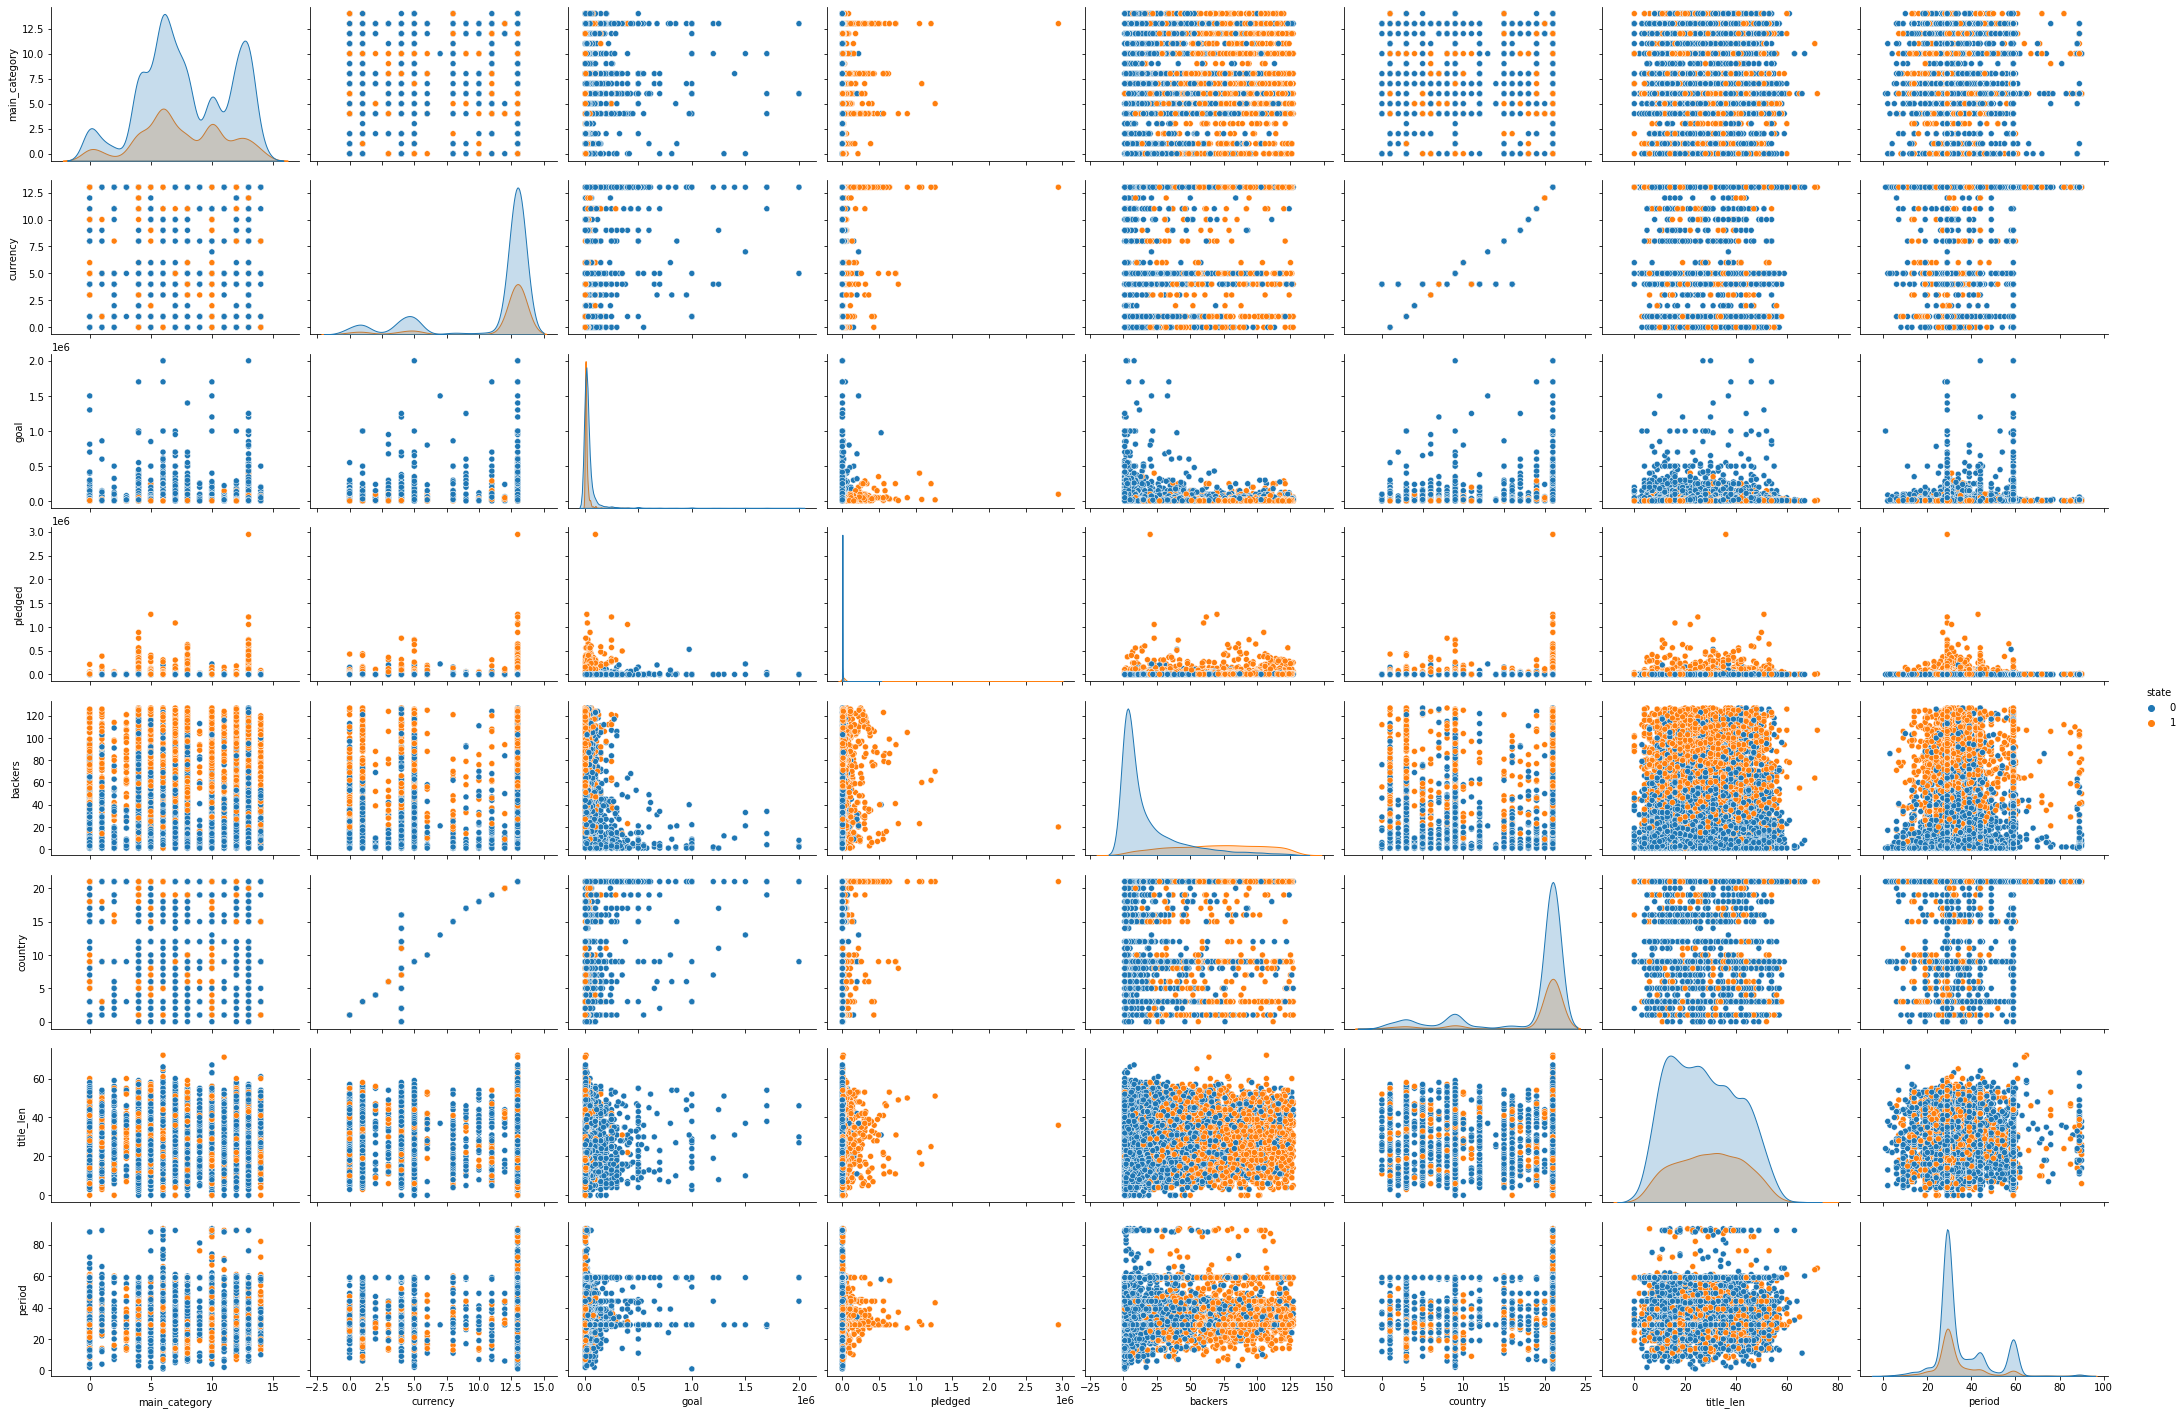

<Figure size 2202.38x1440 with 0 Axes>

In [ ]:
from IPython.display import Image
# Pair plot based on the state

SAMPLE = 10_000
sub_df = pair_data.sample(SAMPLE)

sns_plot = sns.pairplot(sub_df, aspect=1.5, hue='state')
sns_plot.savefig("pairplot.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='pairplot.png') # Show pairplot as image

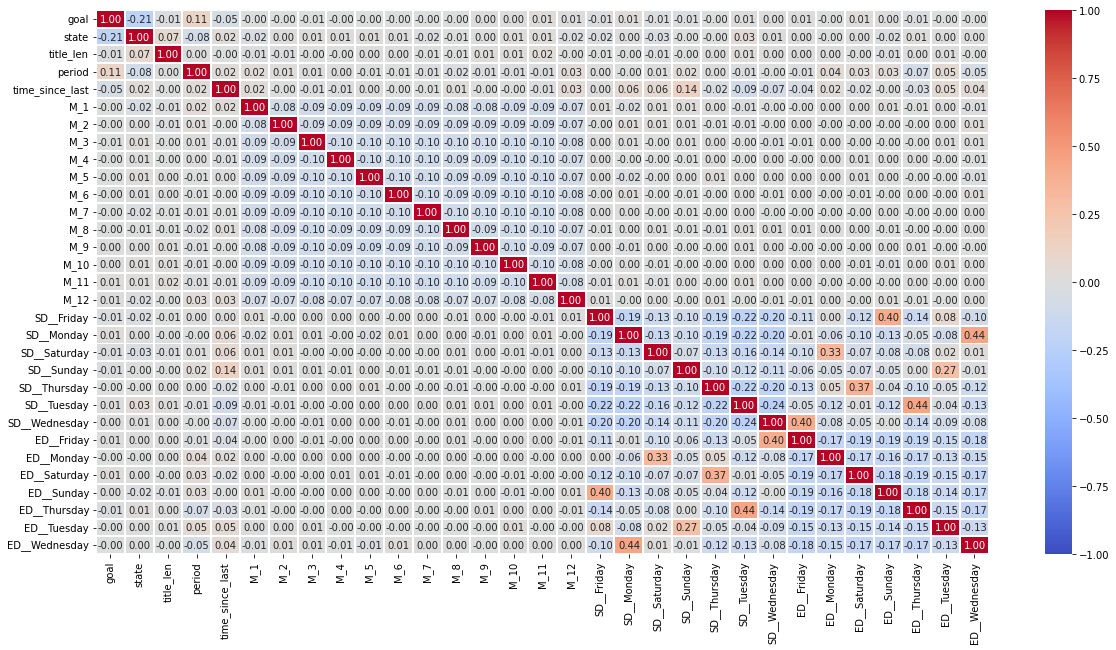

In [ ]:
# Correlation plot using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),
            vmin=-1,
            vmax=1,
            linewidth=1,
            annot=True,
            fmt='.2f',
            cmap='coolwarm')
plt.show()

**Notes:**
* The maximum correlation with the target column "state" is the category feature with 27%. In contrast, the "state" has a negative correlation with the goal feature with -11%.

* The currency is highly correlated with the country as expected so one of them must be dropped before training.

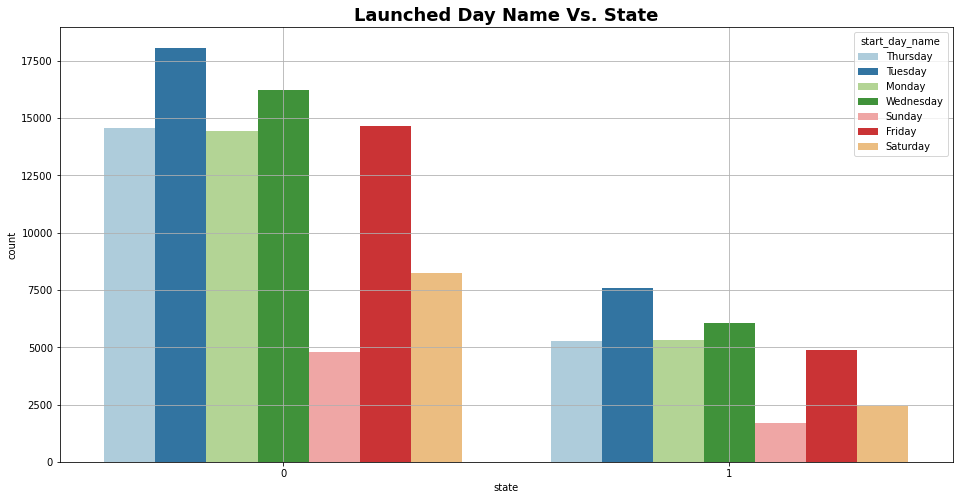

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=vis, x='state', hue='start_day_name', palette='Paired')
plt.title('Launched Day Name Vs. State', fontsize=18, fontweight="bold")
plt.grid()
plt.show()

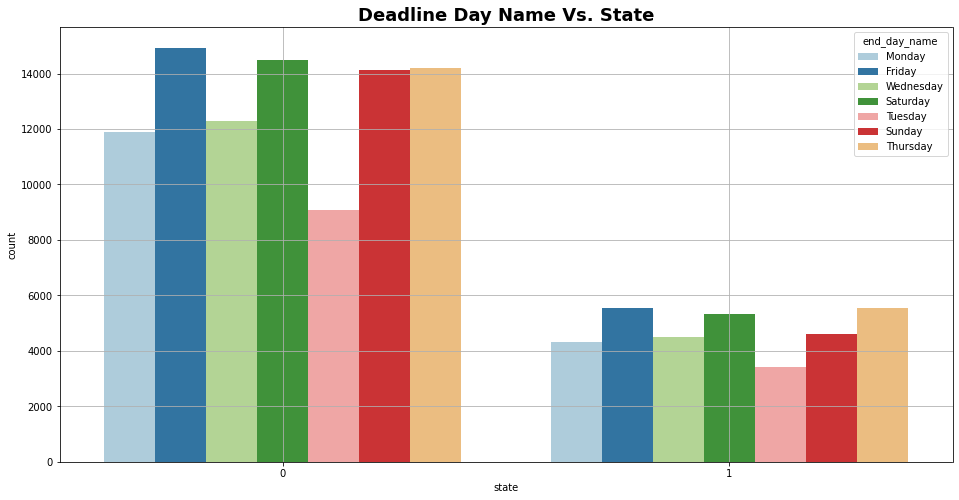

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=vis, x='state', hue='end_day_name', palette='Paired')
plt.title('Deadline Day Name Vs. State', fontsize=18, fontweight="bold")
plt.grid()
plt.show()

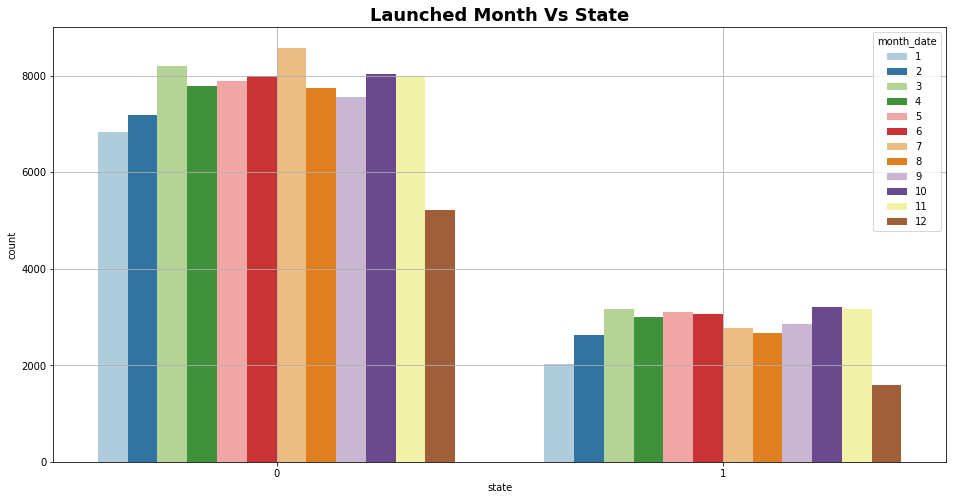

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=vis, x='state' ,hue='month_date', palette='Paired')
plt.title('Launched Month Vs State', fontsize=18, fontweight="bold")
plt.grid()
plt.show()

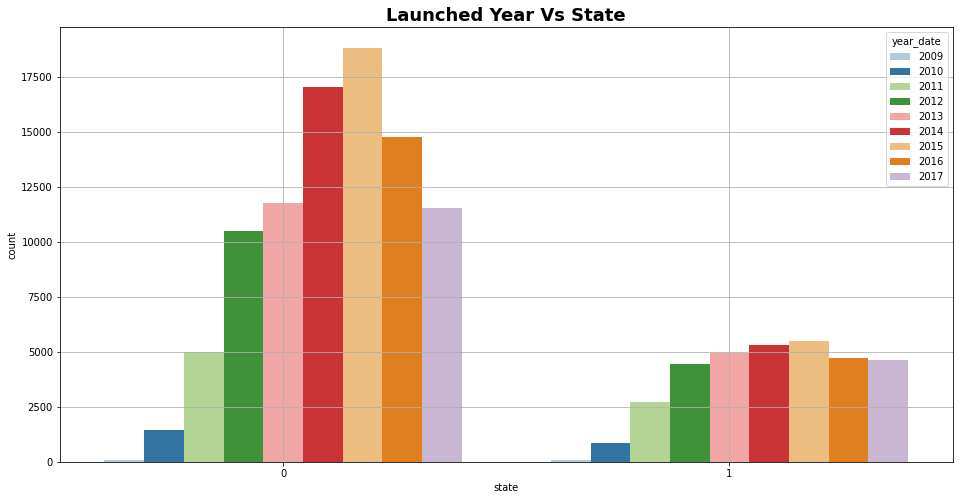

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=vis, x='state' ,hue='year_date', palette='Paired')
plt.title('Launched Year Vs State', fontsize=18, fontweight="bold")
plt.grid()
plt.show()

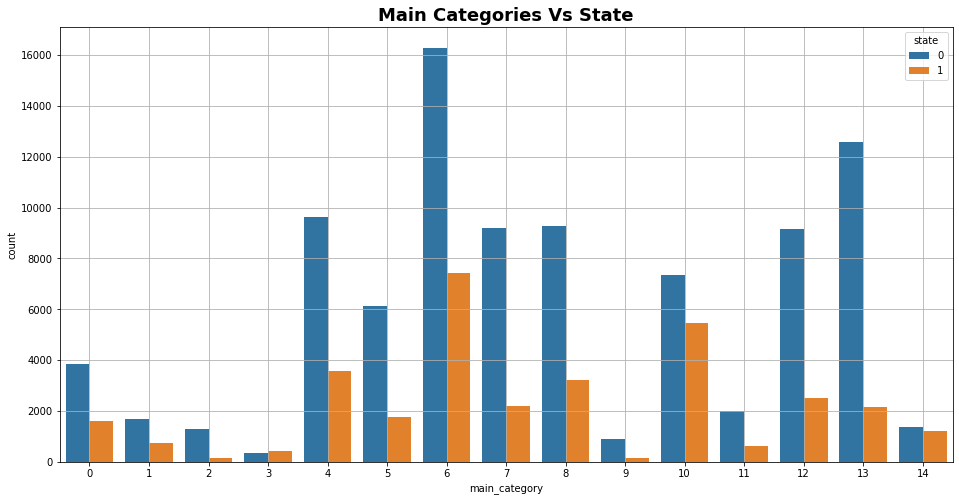

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=vis, x='main_category' ,hue='state')
plt.title('Main Categories Vs State', fontsize=18, fontweight="bold")
plt.grid()
plt.show()

**This figure shows outliers before encoding and scaling the data**

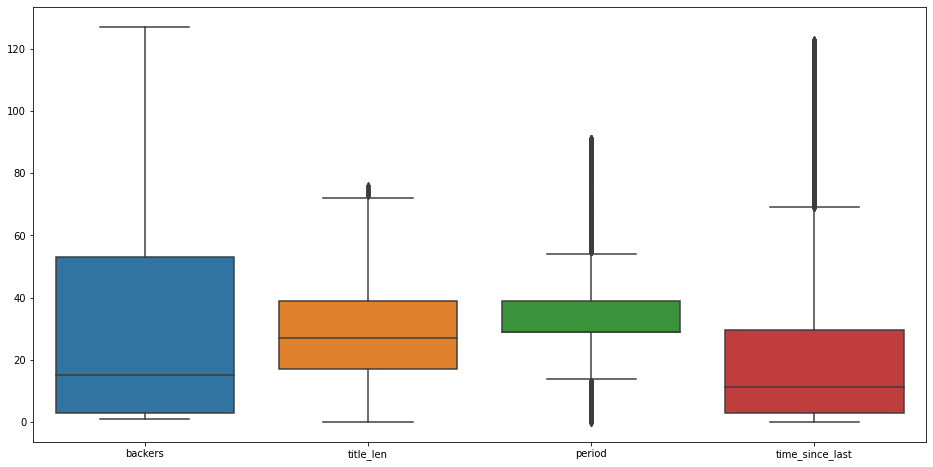

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(data=vis.drop(
                          ['goal','pledged', 'state', 'month_date', 
                           'year_date','start_dayofweek', 'currency', 'country',
                           'end_dayofweek', 'day_date', 'main_category'], axis=1)
            )
plt.show()

#**3. Models**

##3.1 Model Selection

**The Most important metrics are F1 Score and AUC because It is equally important to detect failed and successful projects**

### 3.1.1 Baseline Model

**The baseline model is a random-generated 0's and 1's based on the probability that corresponding label appeared in the test labels**

In [43]:
from sklearn.model_selection import train_test_split

# Split data to train and test sets
X = df.drop(['state','name', 'launched', 'country'], axis=1).reset_index(drop=True)
y = df.state

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = .20, 
                                                    random_state=123,
                                                    shuffle=True
                                                    )


In [45]:
y_dist = {i:v for i,v in enumerate(y_test.value_counts(normalize=True))}
y_dist

{0: 0.7333682134664145, 1: 0.26663178653358555}

In [46]:
from sklearn.metrics import (f1_score, recall_score, precision_score, 
                             accuracy_score, roc_auc_score)

# Generate the predctions
np.random.seed(55)
y_pred = np.random.choice([0,1], 
                          size=y_test.shape, 
                          p=[y_dist[0], y_dist[1]],
                          )

print('================= Test set ==============================')
print('Accurecy of baseline model\t', accuracy_score(y_test, y_pred))
print('F1 score of baseline model\t', f1_score(y_test, y_pred))
print('Recall of baseline model\t', recall_score(y_test, y_pred))
print('Precision of baseline model\t', precision_score(y_test, y_pred))
print('A.U.C. of baseline model\t', roc_auc_score(y_test, y_pred))

================= Test set ==============================
Accurecy of baseline model	 0.6085241679075944
F1 score of baseline model	 0.26572054049973576
Recall of baseline model	 0.2656603773584906
Precision of baseline model	 0.26578073089701
A.U.C. of baseline model	 0.49942002514066564


**Note:** 
However to be fair at evaluation, the baseline model should not be the random-generated process rather the one that was predicted by machine learning algorithms. Thus, logistics regression is the simplest choice in mind.

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.metrics import (f1_score, recall_score, precision_score, 
                             accuracy_score, roc_auc_score)
from sklearn.model_selection import cross_validate
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.backward_difference import BackwardDifferenceEncoder
from category_encoders.glmm import GLMMEncoder
from category_encoders.woe import WOEEncoder
from category_encoders.james_stein import JamesSteinEncoder
from sklearn.model_selection import StratifiedShuffleSplit



cat_columns = ['category', 'main_category', 'currency']
scaled_columns = ['goal', 'title_len', 'period','time_since_last']

encod = make_column_transformer( 
                        ( WOEEncoder(random_state=0), cat_columns ),
                        (StandardScaler(), scaled_columns),
                        remainder="passthrough"
                        )

pip = make_pipeline(
                    (encod),
                    (LogisticRegression(random_state=0))
                    )


CV = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cv_results = cross_validate(pip, 
                            X, y,
                            cv=CV,
                            return_train_score=True,
                            scoring=('accuracy','f1',
                                     'precision','recall', 'roc_auc')
                            )



print('================= Train set ==============================')
print('Accurecy of baseline model\t', cv_results['train_accuracy'].mean())
print('F1 score of baseline model\t', cv_results['train_f1'].mean())
print('Recall of baseline model\t', cv_results['train_recall'].mean())
print('Precision of baseline model\t', cv_results['train_precision'].mean())
print('A.U.C. of baseline model\t', cv_results['train_roc_auc'].mean())

print('================= Test set ==============================')
print('Accurecy of baseline model\t', cv_results['test_accuracy'].mean())
print('F1 score of baseline model\t', cv_results['test_f1'].mean())
print('Recall of baseline model\t', cv_results['test_recall'].mean())
print('Precision of baseline model\t', cv_results['test_precision'].mean())
print('A.U.C. of baseline model\t', cv_results['test_roc_auc'].mean())

================= Train set ==============================
Accurecy of baseline model	 0.7462792288807502
F1 score of baseline model	 0.29138120730019235
Recall of baseline model	 0.19501260014292698
Precision of baseline model	 0.5761268680616315
A.U.C. of baseline model	 0.7216819849787497
================= Test set ==============================
Accurecy of baseline model	 0.7445486376624945
F1 score of baseline model	 0.28765849960068357
Recall of baseline model	 0.19280878591845946
Precision of baseline model	 0.566370714914929
A.U.C. of baseline model	 0.7185372133508134


### 3.1.2 Features Selection

**Feature Importances using Mean Decrease in Impurity**
<Br><Br/>


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.ensemble import ExtraTreesClassifier



cat_columns = ['category', 'main_category', 'currency']
scaled_columns = ['goal', 'title_len', 'period','time_since_last']

encod = make_column_transformer( 
                        ( WOEEncoder(random_state=0), cat_columns ),
                        (StandardScaler(), scaled_columns),
                        remainder="passthrough"
                        )

ETC = ExtraTreesClassifier(100,
                           max_depth=25,
                           min_samples_split=6,
                          bootstrap=True, 
                           oob_score=True, 
                           n_jobs=-1, 
                           random_state=0
                           )

clf = make_pipeline(
                    (encod),
                    (ETC)
                    )


clf.fit(X, y)
std = np.std([tree.feature_importances_ for tree in clf['extratreesclassifier'].estimators_], axis=0)
forest_importances = pd.Series(clf['extratreesclassifier'].feature_importances_, index=X.columns).sort_values(ascending=False)

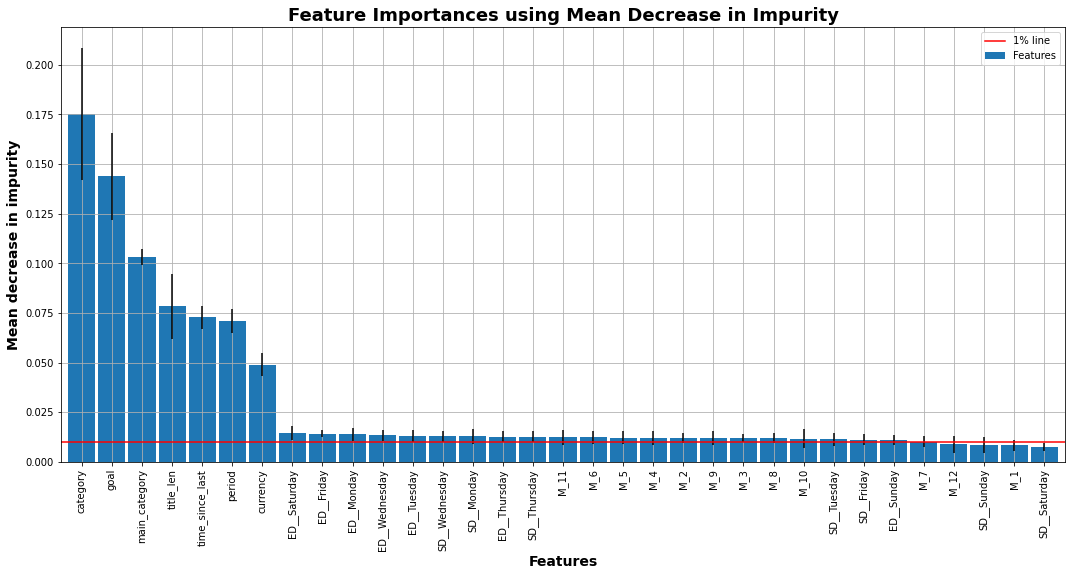

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
forest_importances.plot.bar(yerr=std, ax=ax, width=0.9, grid=True)
ax.set_title("Feature Importances using Mean Decrease in Impurity", fontsize=18, fontweight='bold')
ax.set_ylabel("Mean decrease in impurity",fontsize=14, fontweight='bold')
ax.set_xlabel("Features",fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.axhline(0.01, color='r')
plt.legend(['1% line', 'Features'])
plt.show()

In [ ]:
(forest_importances*100).reset_index().rename(columns={0:'mdi'}).head(10)

,index,mdi
0,category,17.530044
1,goal,14.385014
2,main_category,10.312243
3,title_len,7.832280
4,time_since_last,7.281979
5,period,7.093315
6,currency,4.896874
7,ED__Saturday,1.465833
8,ED__Friday,1.428892
9,ED__Monday,1.391654


### 3.1.3 Classical Models

In [ ]:
pip = make_pipeline(
                    (encod),
                    (LinearSVC(random_state=0))
                    )


CV = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cv_results = cross_validate(pip, 
                            X, y,
                            cv=CV,
                            return_train_score=True,
                            scoring=('accuracy','f1',
                                     'precision','recall', 'roc_auc')
                            )


print('================= Train set ==============================')
print('Accurecy of LinearSVC model\t', cv_results['train_accuracy'].mean())
print('F1 score of LinearSVC model\t', cv_results['train_f1'].mean())
print('Recall of LinearSVC model\t', cv_results['train_recall'].mean())
print('Precision of LinearSVC model\t', cv_results['train_precision'].mean())
print('A.U.C. of LinearSVC model\t', cv_results['train_roc_auc'].mean())

print('================= Test set ==============================')
print('Accurecy of LinearSVC model\t', cv_results['test_accuracy'].mean())
print('F1 score of LinearSVC model\t', cv_results['test_f1'].mean())
print('Recall of LinearSVC model\t', cv_results['test_recall'].mean())
print('Precision of LinearSVC model\t', cv_results['test_precision'].mean())
print('A.U.C. of LinearSVC model\t', cv_results['test_roc_auc'].mean())

================= Train set ==============================
Accurecy of RandomForest model	 0.745434056425323
F1 score of RandomForest model	 0.2266111656953161
Recall of RandomForest model	 0.13942904426975591
Precision of RandomForest model	 0.6049433054166576
A.U.C. of RandomForest model	 0.7215036395042362
================= Test set ==============================
Accurecy of RandomForest model	 0.744162273111442
F1 score of RandomForest model	 0.22336446451593198
Recall of RandomForest model	 0.13753573040469386
Precision of RandomForest model	 0.5945996900362992
A.U.C. of RandomForest model	 0.7183824463485966


### 3.1.4 Bagging Ensemble Models

In [ ]:
pip = make_pipeline(
                    (encod),
                    (RandomForestClassifier(random_state=0))
                    )


CV = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cv_results = cross_validate(pip, 
                            X, y,
                            cv=CV,
                            return_train_score=True,
                            scoring=('accuracy','f1',
                                     'precision','recall', 'roc_auc')
                            )


print('================= Train set ==============================')
print('Accurecy of RandomForest model\t', cv_results['train_accuracy'].mean())
print('F1 score of RandomForest model\t', cv_results['train_f1'].mean())
print('Recall of RandomForest model\t', cv_results['train_recall'].mean())
print('Precision of RandomForest model\t', cv_results['train_precision'].mean())
print('A.U.C. of RandomForest model\t', cv_results['train_roc_auc'].mean())

print('================= Test set ==============================')
print('Accurecy of RandomForest model\t', cv_results['test_accuracy'].mean())
print('F1 score of RandomForest model\t', cv_results['test_f1'].mean())
print('Recall of RandomForest model\t', cv_results['test_recall'].mean())
print('Precision of RandomForest model\t', cv_results['test_precision'].mean())
print('A.U.C. of RandomForest model\t', cv_results['test_roc_auc'].mean())

================= Train set ==============================
Accurecy of RandomForest model	 0.9999919507385198
F1 score of RandomForest model	 0.9999849546288011
Recall of RandomForest model	 0.999969910106443
Precision of RandomForest model	 1.0
A.U.C. of RandomForest model	 1.0
================= Test set ==============================
Accurecy of RandomForest model	 0.7447096228920996
F1 score of RandomForest model	 0.32983199460436496
Recall of RandomForest model	 0.2348427862193471
Precision of RandomForest model	 0.553926830976963
A.U.C. of RandomForest model	 0.7190051803920466


### 3.1.5 Boosting Ensemble Models

In [ ]:
pip = make_pipeline(
                    (encod),
                    (GradientBoostingClassifier(random_state=0))
                    )


CV = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cv_results = cross_validate(pip, 
                            X, y,
                            cv=CV,
                            return_train_score=True,
                            scoring=('accuracy','f1',
                                     'precision','recall', 'roc_auc')
                            )


print('================= Train set ==============================')
print('Accurecy of GradientBoosting model\t', cv_results['train_accuracy'].mean())
print('F1 score of GradientBoosting model\t', cv_results['train_f1'].mean())
print('Recall of GradientBoosting model\t', cv_results['train_recall'].mean())
print('Precision of GradientBoosting model\t', cv_results['train_precision'].mean())
print('A.U.C. of GradientBoosting model\t', cv_results['train_roc_auc'].mean())

print('================= Test set ==============================')
print('Accurecy of GradientBoosting model\t', cv_results['test_accuracy'].mean())
print('F1 score of GradientBoosting model\t', cv_results['test_f1'].mean())
print('Recall of GradientBoosting model\t', cv_results['test_recall'].mean())
print('Precision of GradientBoosting model\t', cv_results['test_precision'].mean())
print('A.U.C. of GradientBoosting model\t', cv_results['test_roc_auc'].mean())

================= Train set ==============================
Accurecy of RandomForest model	 0.7546041775667083
F1 score of RandomForest model	 0.33048561410631183
Recall of RandomForest model	 0.22641892654304735
Precision of RandomForest model	 0.6116554748223864
A.U.C. of RandomForest model	 0.7467014453010136
================= Test set ==============================
Accurecy of RandomForest model	 0.7511731798607477
F1 score of RandomForest model	 0.322148364503
Recall of RandomForest model	 0.22103204453136752
Precision of RandomForest model	 0.593949194328133
A.U.C. of RandomForest model	 0.7383673052537953


### 3.1.6 Deep Neural Networks

In [ ]:
import keras
from keras import Sequential, Model
from keras.layers import (Dense , Activation, Embedding,
                          Conv1D, MaxPooling1D, Dropout,Flatten, LSTM,
                          GlobalAveragePooling1D, Bidirectional, Reshape, 
                          Concatenate, Input, LSTM, Conv2D, MaxPooling2D)


import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
import gensim.downloader as api

from sklearn.utils.class_weight import compute_class_weight

In [ ]:
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
sess = tf.compat.v1.Session(config=config) 
keras.backend.set_session(sess)

In [ ]:
from sklearn.model_selection import train_test_split
# Split data to train and test sets
X = df['name']
y = df['state']


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = .20, 
                                                    random_state=123,
                                                    shuffle=True
                                                    )
weights = compute_class_weight( class_weight ='balanced',
                               classes = np.unique(y_train),
                               y =y_train)

weights = dict(zip(np.unique(y_train), weights))

In [ ]:
glove_gensim  = api.load('glove-wiki-gigaword-50')

# glove-twitter-100
# glove-wiki-gigaword-300
# word2vec-google-news-300

[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
MAX_WORD = 11_500

tokenizer = Tokenizer(num_words=MAX_WORD, oov_token="<OOV>")
X1 = pd.concat([X_train, X_test], axis=0)
tokenizer.fit_on_texts(X1)

In [ ]:
vector_size = 50

gensim_weight_matrix = np.zeros((MAX_WORD ,vector_size))

for word, index in tokenizer.word_index.items():
    if index < MAX_WORD:  
        if word in glove_gensim.vocab:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(vector_size)

print(gensim_weight_matrix.shape)

(11500, 50)


In [ ]:
MAX_LEN = X1.apply(len).max()
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, padding='post', truncating='post', maxlen=MAX_LEN)

test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, padding='post', truncating='post', maxlen=MAX_LEN)

In [ ]:
EMBEDDING_DIM = vector_size

model = Sequential([
                    Embedding(input_dim = MAX_WORD,
                              output_dim = EMBEDDING_DIM,
                              input_length= train_padded.shape[1],
                              weights = [gensim_weight_matrix],
                              trainable = False
                              ),
                    Bidirectional(CuDNNLSTM(100,return_sequences=True)),
                    Bidirectional(CuDNNLSTM(200,return_sequences=True)),
                    Bidirectional(CuDNNLSTM(100,return_sequences=False)),
                    Dense(1, activation = 'sigmoid')
                  ])

In [ ]:
METRICES = [tf.keras.metrics.BinaryAccuracy(name="accuracy"),
tf.keras.metrics.Recall(name='recall'),
tf.keras.metrics.Precision(name='precision'),
tf.keras.metrics.AUC(name='auc')
]

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.09, name="Nadam")
model.compile(loss = 'binary_crossentropy', optimizer = optimizer ,metrics = METRICES)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 76, 50)            575000    
                                                                 
 bidirectional (Bidirectiona  (None, 76, 200)          121600    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 76, 400)          643200    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 200)              401600    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                        

In [ ]:
es = keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 2, patience = 9)
rlp = keras.callbacks.ReduceLROnPlateau(factor=.5, patience=3, verbose=2)
# lrs = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 24))

In [ ]:
history = model.fit(train_padded,y_train, 
                              epochs = 25, 
                              batch_size = 512, 
                              validation_data=(test_padded, y_test),
                              verbose = 1, 
                              class_weight=weights,
                              callbacks= [es,rlp]
                              )

Epoch 1/25
195/195 [==============================] - 78s 350ms/step - loss: 0.9673 - accuracy: 0.4996 - recall: 0.5023 - precision: 0.2681 - auc: 0.4993 - val_loss: 1.5417 - val_accuracy: 0.2666 - val_recall: 1.0000 - val_precision: 0.2666 - val_auc: 0.5000 - lr: 0.0900
Epoch 2/25
195/195 [==============================] - 67s 342ms/step - loss: 0.9202 - accuracy: 0.4998 - recall: 0.5002 - precision: 0.2677 - auc: 0.5006 - val_loss: 0.5933 - val_accuracy: 0.7334 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_auc: 0.5000 - lr: 0.0900
Epoch 3/25
195/195 [==============================] - 66s 341ms/step - loss: 0.9039 - accuracy: 0.4995 - recall: 0.4984 - precision: 0.2671 - auc: 0.4996 - val_loss: 1.2277 - val_accuracy: 0.2666 - val_recall: 1.0000 - val_precision: 0.2666 - val_auc: 0.5000 - lr: 0.0900
Epoch 4/25
195/195 [==============================] - 67s 342ms/step - loss: 0.8754 - accuracy: 0.4993 - recall: 0.4993 - precision: 0.2672 - auc: 0.5003 - val_loss: 0.5799 - v

In [ ]:
val = np.array(history.history['val_loss'])
val_1 = np.roll(val, 1)
val_1[0] = 0

val_df = pd.DataFrame({'Original':val, 'Shifted':val_1, 'diff':val_1-val})
val_df['diff'].loc[0] = 0
val_df.sort_values('diff', ascending=False)

,Original,Shifted,diff
1,0.593283,1.541693,0.948409
3,0.579880,1.227734,0.647854
6,0.579880,0.981030,0.401150
9,0.611367,0.672823,0.061456
12,0.650679,0.694841,0.044161
0,1.541693,0.000000,0.000000
10,0.632480,0.611367,-0.021113
7,0.601806,0.579880,-0.021926
11,0.694841,0.632480,-0.062361
8,0.672823,0.601806,-0.071016


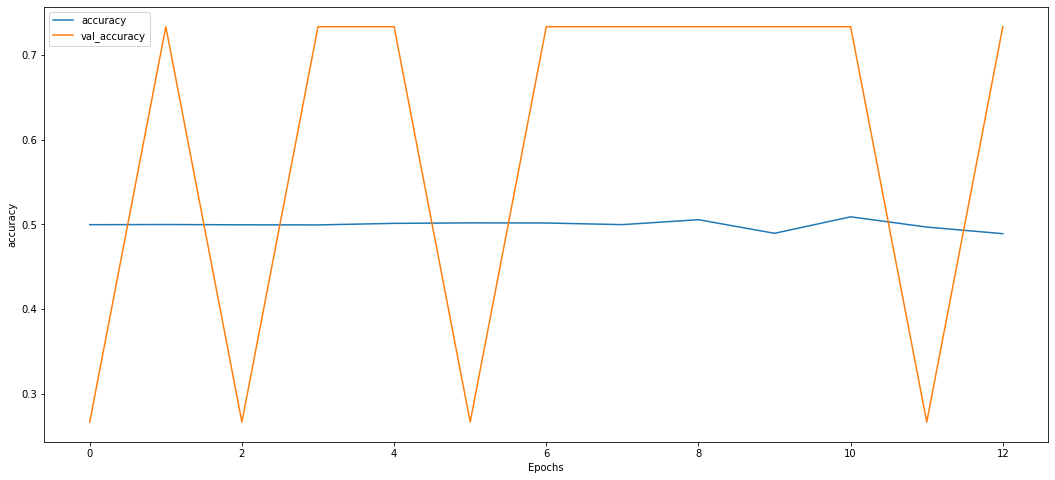

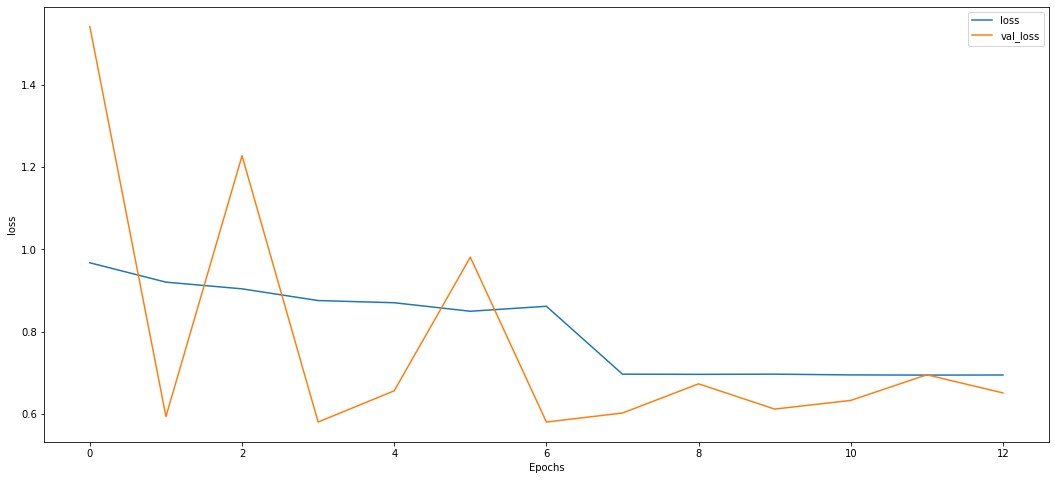

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.figure(figsize=(18,8))
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
X = df.drop(['name', 'state', 'launched','country'], axis=1)
y = df['state']


X_train2, X_test2, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = .20, 
                                                    random_state=123,
                                                    shuffle=True
                                                    )

from category_encoders.woe import WOEEncoder

cat_columns = ['category', 'main_category', 'currency']
scaled_columns = ['goal', 'title_len', 'period','time_since_last']

woe = WOEEncoder(cols=cat_columns)
X_train2 = woe.fit_transform(X_train2,y_train)
X_test2 = woe.transform(X_test2,y_test)

X_train2[scaled_columns] = X_train2[scaled_columns].apply(lambda x: np.log(1+x))
X_test2[scaled_columns] = X_test2[scaled_columns].apply(lambda x: np.log(1+x))

X_train2 = np.expand_dims(X_train2.to_numpy(), axis=1)
X_test2 =  np.expand_dims(X_test2.to_numpy(), axis=1)

xt1 = [train_padded, X_train2]
xt2 = [test_padded, X_test2]

In [ ]:
EMBEDDING_DIM = vector_size
input_layer1 = Input(shape=train_padded.shape[1:], name='Input1')
embedding = Embedding(input_dim = MAX_WORD, 
                      output_dim = EMBEDDING_DIM,
                      input_length= train_padded.shape[1],
                      weights = [gensim_weight_matrix],
                      trainable = False, name='Embedding')(input_layer1)

lstm1 = CuDNNLSTM(100, go_backwards=True, return_sequences=True, name='LSTM1')(embedding)
lstm2 = CuDNNLSTM(200,go_backwards=True,return_sequences=True, name='LSTM2')(lstm1)
lstm3 = CuDNNLSTM(100,go_backwards=True,return_sequences=True, name='LSTM3')(lstm2)
gap1 = GlobalAveragePooling1D(name='G.A.Pooling')(lstm3)

input_layer2 = Input(shape=X_train2.shape[1:], name='Input2')
dens1 = Dense(64, name='FC1',activation='relu')(input_layer2)
dens2 = Dense(128, name='FC2', activation='relu')(dens1)
dens3 = Dense(32, name='FC3', activation='relu')(dens2)
gap2 = GlobalAveragePooling1D(name='G.A.Pooling2')(dens3)

combaind = Concatenate(axis=1, name='Combaind')([gap1, gap2])
dens3 = Dense(64, name='FC4', activation='relu')(combaind)
dens4 = Dense(128, name='FC5', activation='relu')(dens3)
output = Dense(1, 'sigmoid', name='Output')(dens4)

model = Model(inputs=[input_layer1,input_layer2], outputs=output)

In [ ]:
METRICES = [tf.keras.metrics.BinaryAccuracy(name="accuracy"),
tf.keras.metrics.Recall(name='recall'),
tf.keras.metrics.Precision(name='precision'),
tf.keras.metrics.AUC(name='auc')
]

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.09, name="Nadam")
model.compile(loss = 'binary_crossentropy', optimizer = optimizer ,metrics = METRICES)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input1 (InputLayer)            [(None, 76)]         0           []                               
                                                                                                  
 Embedding (Embedding)          (None, 76, 50)       575000      ['Input1[0][0]']                 
                                                                                                  
 Input2 (InputLayer)            [(None, 1, 33)]      0           []                               
                                                                                                  
 LSTM1 (CuDNNLSTM)              (None, 76, 100)      60800       ['Embedding[0][0]']              
                                                                                            

In [ ]:
es = keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 2, patience = 9)
rlp = keras.callbacks.ReduceLROnPlateau(factor=.5, patience=3, verbose=2)
# lrs = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 24))

In [ ]:
history = model.fit(xt1,y_train, 
                              epochs = 50, 
                              batch_size = 512, 
                              validation_data=(xt2, y_test),
                              verbose = 1, 
                              class_weight=weights,
                              callbacks= [es,rlp]
                              )

Epoch 1/50
195/195 [==============================] - 45s 179ms/step - loss: 1.4764 - accuracy: 0.5237 - recall: 0.4489 - precision: 0.2677 - auc: 0.4992 - val_loss: 0.6603 - val_accuracy: 0.7334 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_auc: 0.5000 - lr: 0.0900
Epoch 2/50
195/195 [==============================] - 31s 159ms/step - loss: 0.6934 - accuracy: 0.4877 - recall: 0.5246 - precision: 0.2673 - auc: 0.5006 - val_loss: 0.6807 - val_accuracy: 0.7334 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_auc: 0.5000 - lr: 0.0900
Epoch 3/50
195/195 [==============================] - 30s 156ms/step - loss: 0.6934 - accuracy: 0.5127 - recall: 0.4666 - precision: 0.2662 - auc: 0.4969 - val_loss: 0.6625 - val_accuracy: 0.7334 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_auc: 0.5000 - lr: 0.0900
Epoch 4/50
195/195 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.5054 - recall: 0.4913 - precision: 0.2685 - auc: 0.5012
Epoch 00004: 

In [ ]:
val = np.array(history.history['val_loss'])
val_1 = np.roll(val, 1)
val_1[0] = 0

val_df = pd.DataFrame({'Original':val, 'Shifted':val_1, 'diff':val_1-val})
val_df['diff'].loc[0] = 0
val_df.sort_values('diff', ascending=False)

,Original,Shifted,diff
5,0.697908,0.728232,0.030324
7,0.690674,0.719877,0.029203
2,0.662526,0.680658,0.018132
0,0.660334,0.000000,0.000000
9,0.700052,0.697449,-0.002603
8,0.697449,0.690674,-0.006774
3,0.680883,0.662526,-0.018357
1,0.680658,0.660334,-0.020324
6,0.719877,0.697908,-0.021969
4,0.728232,0.680883,-0.047349


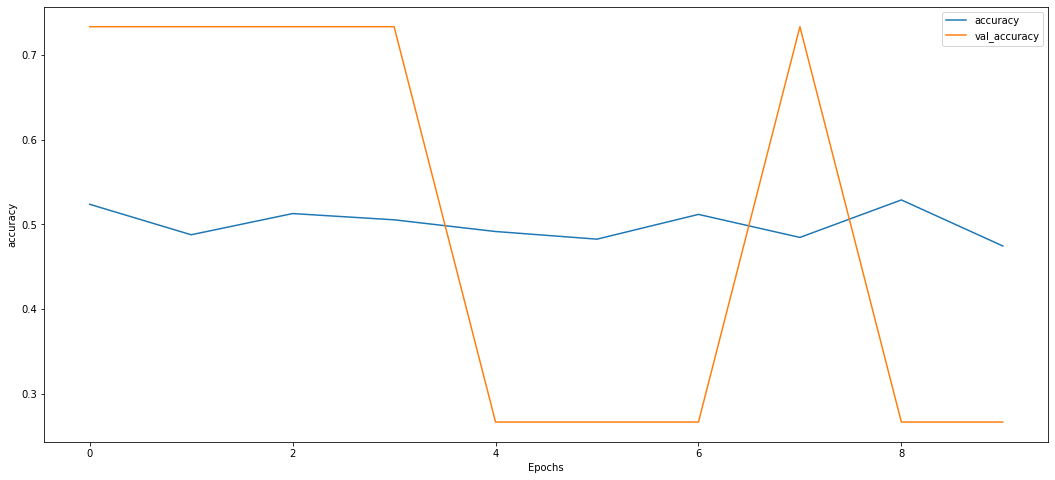

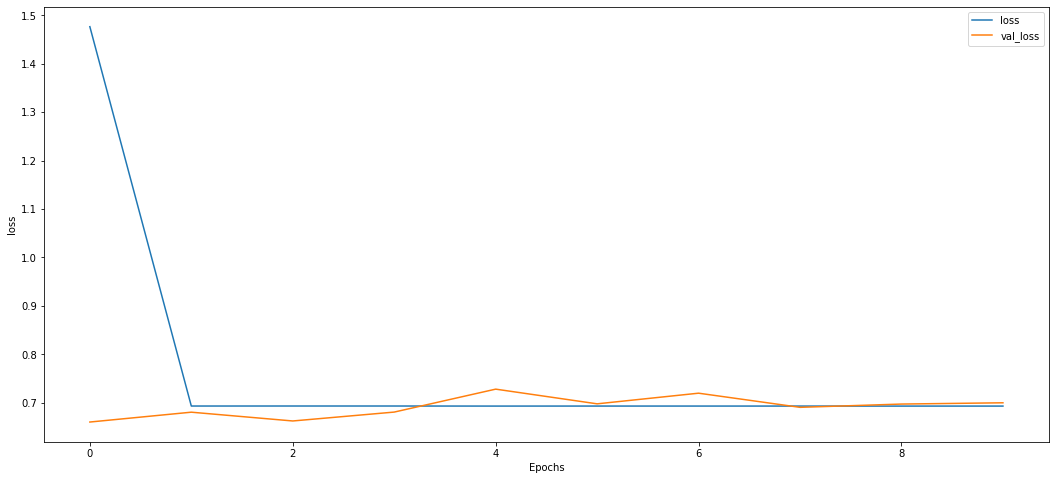

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### 3.1.7 Pre-trained Models

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
!pip install tensorflow-text
import tensorflow_text as text

     |████████████████████████████████| 4.9 MB 5.2 MB/s 


In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
# Bert layers
input_layer1 = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(input_layer1)
bert_output = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(bert_output['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[input_layer1], outputs = [l])

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.01, name="Nadam")
model.compile(loss = 'binary_crossentropy', optimizer = optimizer ,metrics = METRICES)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [ ]:
es = keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 2, patience = 3)
rlp = keras.callbacks.ReduceLROnPlateau(factor=.5, patience=3, verbose=2)

In [ ]:
history = model.fit(X_train,y_train, 
                              epochs = 3, 
                              batch_size = 128, 
                              validation_data=(X_test, y_test),
                              verbose = 1, 
                              class_weight=weights,
                              # callbacks= [rlp, es]
                              )

Epoch 1/3
777/777 [==============================] - 2959s 4s/step - loss: 0.8015 - accuracy: 0.4740 - recall: 0.6138 - precision: 0.2798 - auc: 0.5303 - val_loss: 1.5433 - val_accuracy: 0.2669 - val_recall: 1.0000 - val_precision: 0.2667 - val_auc: 0.5786
Epoch 2/3
777/777 [==============================] - 2859s 4s/step - loss: 0.7734 - accuracy: 0.5374 - recall: 0.5289 - precision: 0.2962 - auc: 0.5507 - val_loss: 0.5853 - val_accuracy: 0.7328 - val_recall: 0.0406 - val_precision: 0.4882 - val_auc: 0.5868
Epoch 3/3
777/777 [==============================] - 2869s 4s/step - loss: 0.7528 - accuracy: 0.5431 - recall: 0.5328 - precision: 0.3006 - auc: 0.5588 - val_loss: 0.5787 - val_accuracy: 0.7304 - val_recall: 0.1647 - val_precision: 0.4838 - val_auc: 0.6218


In [ ]:
val = np.array(history.history['val_loss'])
val_1 = np.roll(val, 1)
val_1[0] = 0

val_df = pd.DataFrame({'Original':val, 'Shifted':val_1, 'diff':val_1-val})
val_df['diff'].loc[0] = 0
val_df.sort_values('diff', ascending=False)

,Original,Shifted,diff
1,0.585311,1.543315,0.958004
2,0.578747,0.585311,0.006565
0,1.543315,0.000000,0.000000


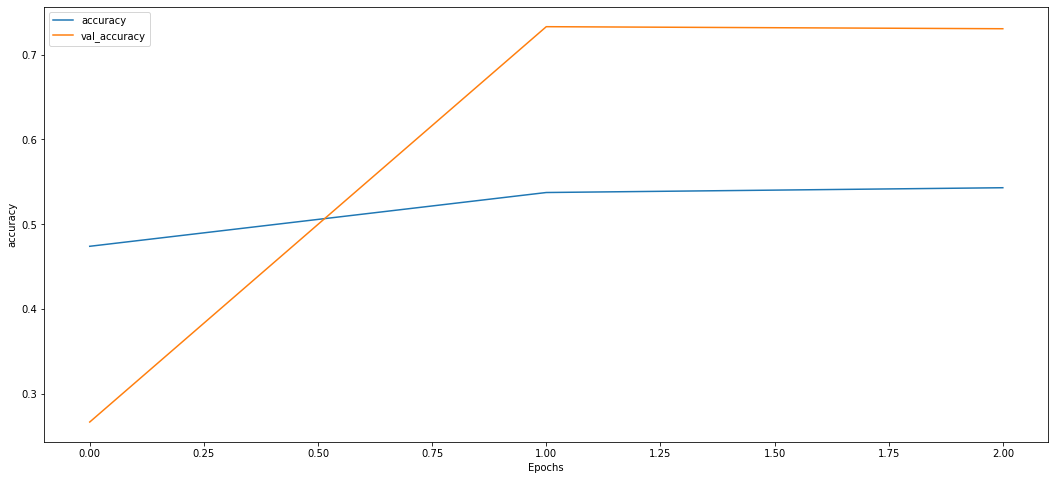

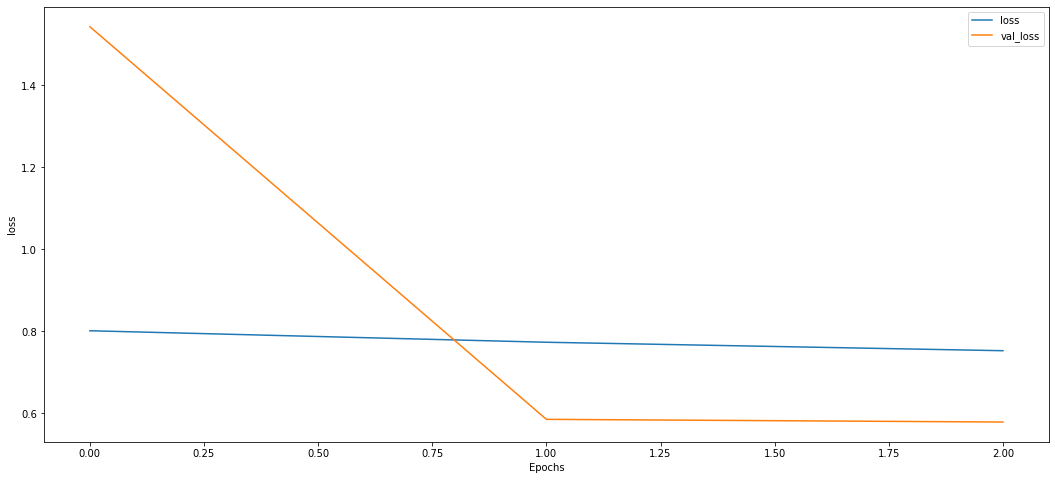

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### 3.1.6 Stacking Ensemble Models

In [ ]:
from tqdm import tqdm
increment = 700
loop = np.arange(0, len(df.name), increment )
out = []
for batch in tqdm(loop):
  l,o = 0,0
  if batch == loop[-1]:
    l,o = (batch,-1)
    preprocessed_text = bert_preprocess(df.name[l:].to_list())
    out.append(bert_encoder(preprocessed_text)['default'])
  else:
    l, o = (batch,batch+increment)

  preprocessed_text = bert_preprocess(df.name[l:o].to_list())
  out.append(bert_encoder(preprocessed_text)['default'])

out = np.array(out)
print('Output shape\t', out.shape)

 43%|████▎     | 76/178 [41:59<57:05, 33.58s/it]

In [ ]:
base = []
for i in range(0,len(out)):
  base.append(out[i].numpy())

base = np.array(base)
base.shape

In [ ]:
name_features = pd.DataFrame(base.T)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(name_features)
print('Explained Variance Ratio\t',pca.explained_variance_ratio_.sum())

In [ ]:
pca_data = pd.DataFrame(pca.components_.T).rename(columns={0:'pca_0',1:'pca_1'})
print('PCA output shape\t',pca_data.shape)

In [ ]:
# Split data to train and test sets
X = df.drop(['state','name', 'launched', 'country'], axis=1).reset_index(drop=True)
y = df.state.iloc[:-1]
X_m = pd.concat([X,pca_data], axis=1).dropna()

In [ ]:
pip = make_pipeline(
                    (encod),
                    (GradientBoostingClassifier(random_state=0))
                    )


CV = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cv_results = cross_validate(pip, 
                            X_m, y,
                            cv=CV,
                            return_train_score=True,
                            scoring=('accuracy','f1',
                                     'precision','recall', 'roc_auc')
                            )


print('================= Train set ==============================')
print('Accurecy of GradientBoosting model\t', cv_results['train_accuracy'].mean())
print('F1 score of GradientBoosting model\t', cv_results['train_f1'].mean())
print('Recall of GradientBoosting model\t', cv_results['train_recall'].mean())
print('Precision of GradientBoosting model\t', cv_results['train_precision'].mean())
print('A.U.C. of GradientBoosting model\t', cv_results['train_roc_auc'].mean())

print('================= Test set ==============================')
print('Accurecy of GradientBoosting model\t', cv_results['test_accuracy'].mean())
print('F1 score of GradientBoosting model\t', cv_results['test_f1'].mean())
print('Recall of GradientBoosting model\t', cv_results['test_recall'].mean())
print('Precision of GradientBoosting model\t', cv_results['test_precision'].mean())
print('A.U.C. of GradientBoosting model\t', cv_results['test_roc_auc'].mean())

## 3.2 Hyperparameters Tuning

In [51]:
from sklearn.model_selection import GridSearchCV
parameters = {'gradientboostingclassifier__learning_rate':[1, 0.1, 0.01],
              'gradientboostingclassifier__n_estimators' :[50,100,200], 
              'gradientboostingclassifier__max_depth':[3,6]}

pip = make_pipeline(
                    (encod),
                    (GradientBoostingClassifier(random_state=0))
                    )


CV = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=0)



clf = GridSearchCV(pip, parameters, scoring=('accuracy','f1',
                                     'precision','recall', 'roc_auc'),
                   cv =CV, verbose=10, refit='f1')

clf.fit(X, y)

print('Best Classifier\n',clf.best_estimator_)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV 1/2; 1/18] START gradientboostingclassifier__learning_rate=1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=50
[CV 1/2; 1/18] END gradientboostingclassifier__learning_rate=1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=50; accuracy: (test=0.748) f1: (test=0.358) precision: (test=0.563) recall: (test=0.263) roc_auc: (test=0.736) total time=  12.0s
[CV 2/2; 1/18] START gradientboostingclassifier__learning_rate=1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=50
[CV 2/2; 1/18] END gradientboostingclassifier__learning_rate=1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=50; accuracy: (test=0.749) f1: (test=0.360) precision: (test=0.568) recall: (test=0.264) roc_auc: (test=0.731) total time=   9.8s
[CV 1/2; 2/18] START gradientboostingclassifier__learning_rate=1, gradientboostingcla

In [55]:
pip = make_pipeline(
                    (encod),
                    (GradientBoostingClassifier(learning_rate=1, max_depth=6,
                                            n_estimators=200,
                                            random_state=0))
                    )


CV = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cv_results = cross_validate(pip, 
                            X, y,
                            cv=CV,
                            return_train_score=True,
                            scoring=('accuracy','f1',
                                     'precision','recall', 'roc_auc')
                            )


print('================= Train set ==============================')
print('Accurecy of GradientBoosting model\t', cv_results['train_accuracy'].mean())
print('F1 score of GradientBoosting model\t', cv_results['train_f1'].mean())
print('Recall of GradientBoosting model\t', cv_results['train_recall'].mean())
print('Precision of GradientBoosting model\t', cv_results['train_precision'].mean())
print('A.U.C. of GradientBoosting model\t', cv_results['train_roc_auc'].mean())

print('================= Test set ==============================')
print('Accurecy of GradientBoosting model\t', cv_results['test_accuracy'].mean())
print('F1 score of GradientBoosting model\t', cv_results['test_f1'].mean())
print('Recall of GradientBoosting model\t', cv_results['test_recall'].mean())
print('Precision of GradientBoosting model\t', cv_results['test_precision'].mean())
print('A.U.C. of GradientBoosting model\t', cv_results['test_roc_auc'].mean())

================= Train set ==============================
Accurecy of GradientBoosting model	 0.8633637863726003
F1 score of GradientBoosting model	 0.7081481007429514
Recall of GradientBoosting model	 0.6196938353330576
Precision of GradientBoosting model	 0.8260758539710513
A.U.C. of GradientBoosting model	 0.9157609390836268
================= Test set ==============================
Accurecy of GradientBoosting model	 0.7128184489073127
F1 score of GradientBoosting model	 0.38024823447132533
Recall of GradientBoosting model	 0.32932149842034003
Precision of GradientBoosting model	 0.4498136568344181
A.U.C. of GradientBoosting model	 0.6798455198329577


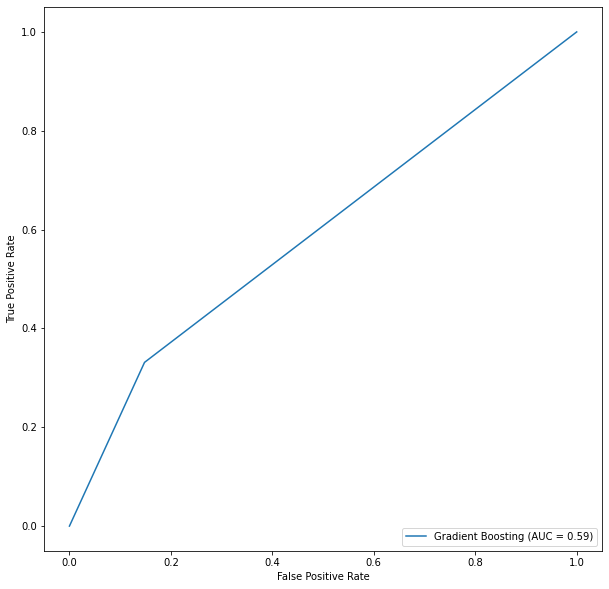

In [72]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
clf = pip
clf.fit(X_train, y_train)


pred = clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Gradient Boosting')

fig, ax = plt.subplots(figsize=(10,10))
display.plot(ax=ax)
plt.show()

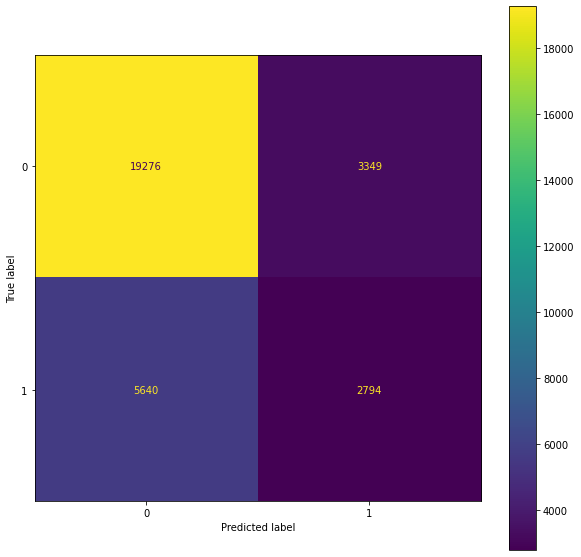

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split



predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

#**4. Conclusion**

Data is not sufficient and consequently that made models biases. Thus, more data needs to be collected. Additionally, the data collection need to be rethinked. For example, unifiying the goal and pleadge number to one currancy.